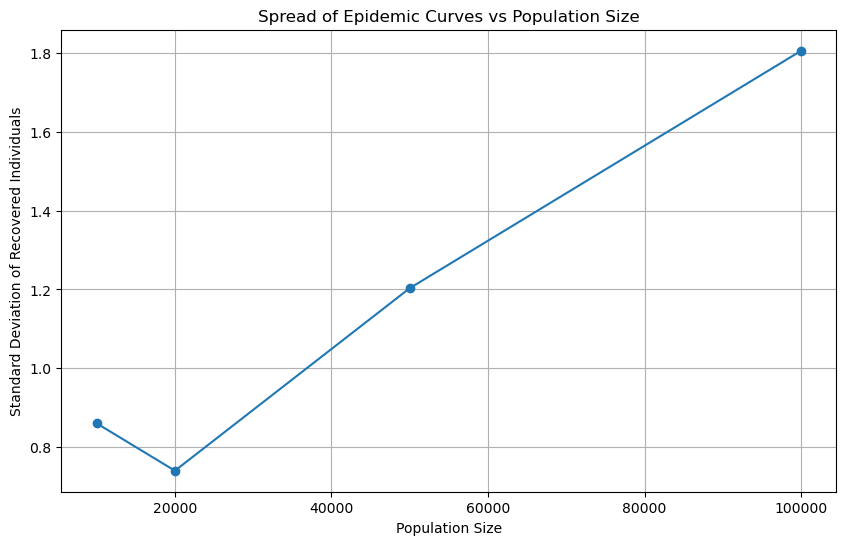

In [7]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def run_sir_model(N, initial_S, initial_I, tr, rr, time_steps, num_simulations):
    spread_data = []
    
    for sim in range(num_simulations):
        # Initialize the population
        S = initial_S
        I = initial_I
        R = 0
        Sc, Ic, Rc = [], [], []
        pop = ['S'] * S + ['I'] * I + ['R'] * R

        # Run the model for the specified number of time steps
        for t in range(time_steps):
            npop = []
            for ag in pop:
                p = random.random()
                if ag == 'S':
                    for _ in range(5):  # Assume each agent has 5 random contacts
                        contact = random.randint(0, N-1)
                        if pop[contact] == 'I' and p <= tr:
                            ag = 'I'
                            break
                elif ag == 'I':
                    if p <= rr:
                        ag = 'R'
                npop.append(ag)
            
            # Update population
            pop = npop
            S = pop.count('S')
            I = pop.count('I')
            R = pop.count('R')
            Sc.append(S)
            Ic.append(I)
            Rc.append(R)

        # Record the number of recovered individuals at the end
        spread_data.append(Rc[-1])
    
    return spread_data

# Parameters
time_steps = 100
transmission_rate = 0.5
recovery_rate = 0.1
num_simulations = 20

# Population sizes to test
population_sizes = [10000, 20000, 50000, 100000]
spread_results = []

for N in population_sizes:
    initial_S = int(0.8 * N)  # 80% Susceptible
    initial_I = int(0.2 * N)  # 20% Infected
    spread_data = run_sir_model(N, initial_S, initial_I, transmission_rate, recovery_rate, time_steps, num_simulations)
    
    # Calculate the standard deviation of recovered individuals
    spread_std = np.std(spread_data)
    spread_results.append(spread_std)

# Plot the spread vs population size
plt.figure(figsize=(10, 6))
plt.plot(population_sizes, spread_results, marker='o')
plt.title("Spread of Epidemic Curves vs Population Size")
plt.xlabel("Population Size")
plt.ylabel("Standard Deviation of Recovered Individuals")
plt.grid()
plt.show()


In [ ]:
#10000 people, 4 people per households. 2500 households and assign each person random to an household . same for workplaces  